# Over- and Underfitting

This notebook will explain and visualize the differences between underfitting, overfitting, and a good fit. Also It'll talk about bias-variance tradeoff.

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

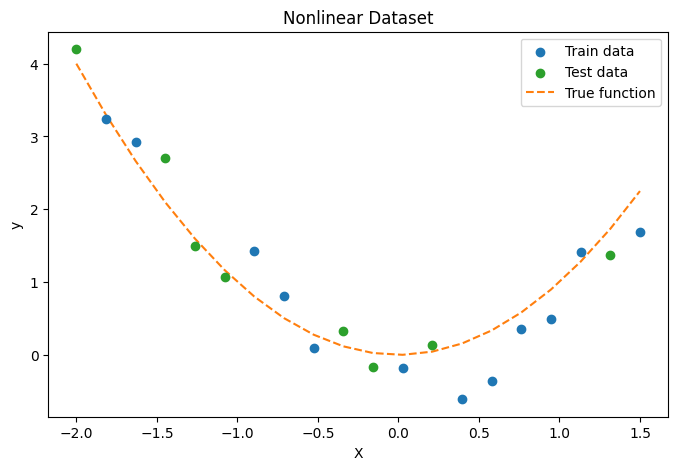

In [6]:
np.random.seed(42)

N = 20
x = np.linspace(-2, 1.5, N)

y_true = x**2
noise = 0.4 * np.random.randn(N)
y = y_true + noise

X = x[:, np.newaxis]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=2)

plt.figure(figsize=(8,5))
plt.scatter(X_train, y_train, color='C0', label='Train data', zorder=2)
plt.scatter(X_test, y_test, color='C2', label='Test data', zorder=2)
plt.plot(x, y_true, color='C1', linestyle='--', label='True function', zorder=1)
plt.xlabel('X')
plt.ylabel('y')
plt.title('Nonlinear Dataset')
plt.legend()
plt.show()

---

### **Underfitting**

Underfitting happens when the model is too simple to capture the underlying relationship in the data. A model that is too simple to capture the underlying pattern in the data is said to have high bias.

A classic example is fitting a linear model to nonlinear data:

MSE: 1.1678765536325035


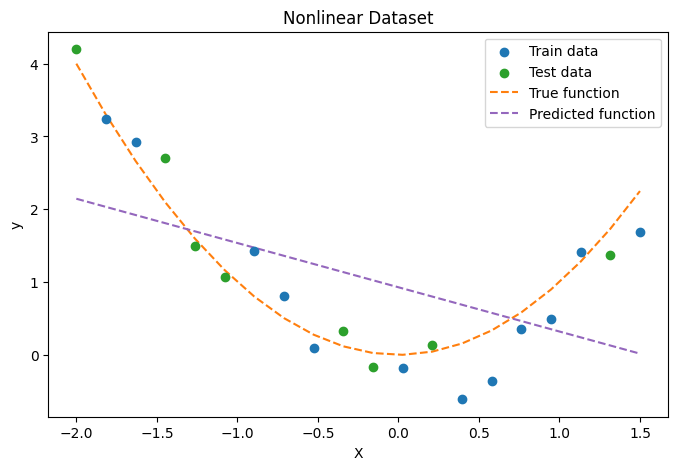

In [8]:
linear = LinearRegression().fit(X_train, y_train)

y_pred = linear.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("MSE:", mse)

plt.figure(figsize=(8,5))
plt.scatter(X_train, y_train, color='C0', label='Train data', zorder=2)
plt.scatter(X_test, y_test, color='C2', label='Test data', zorder=2)
plt.plot(X, y_true, color='C1', linestyle='--', label='True function', zorder=1)
plt.plot(X, linear.predict(X), color='C4', linestyle='--', label='Predicted function', zorder=1)
plt.xlabel('X')
plt.ylabel('y')
plt.title('Nonlinear Dataset')
plt.legend()
plt.show()

As we can see, the linear model cannot follow the curved pattern in the data.
No matter how we tune the parameters, a linear model simply does not have enough flexibility to represent this kind of function.

Further visualization: Gradient Descent MSE vs. Iteration

In [334]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

X_train_t = torch.tensor(X_train, dtype=torch.float32)
y_train_t = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)

X_test_t = torch.tensor(X_test, dtype=torch.float32)
y_test_t = torch.tensor(y_test, dtype=torch.float32).view(-1, 1)

model = nn.Linear(X_train.shape[1], 1)

criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.001)

train_losses = []
test_losses = []

num_iters = 2000

for i in range(num_iters):
    model.train()
    y_pred = model(X_train_t)
    loss = criterion(y_pred, y_train_t)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    train_losses.append(loss.item())

    model.eval()
    with torch.no_grad():
        y_pred_test = model(X_test_t)
        test_loss = criterion(y_pred_test, y_test_t).item()
        test_losses.append(test_loss)


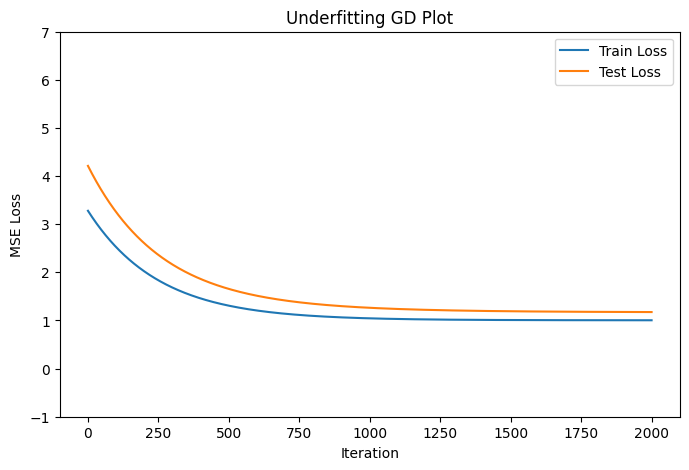

In [335]:
plt.figure(figsize=(8, 5))
plt.plot(train_losses, label="Train Loss")
plt.plot(test_losses, label="Test Loss")
plt.ylim(-1, 7)
plt.xlabel("Iteration")
plt.ylabel("MSE Loss")
plt.title("Underfitting GD Plot")
plt.legend()
plt.show()


The train and test losses end up relatively close to each other, which tells us the model is not overfitting.

However, both losses remain high, meaning the model is underfitted (it fails to capture the true structure of the data)

---

### Overfitting

Overfitting happens when a model is too complex and ends up fitting the noise in the training data instead of the underlying pattern. A model that is overly flexible and ends up fitting the noise in the training data is said to have high variance.

This can happen with high-degree polynomials or models with excessive flexibility:

In [10]:
from sklearn.preprocessing import PolynomialFeatures

degree = 10
poly = PolynomialFeatures(degree)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

model = LinearRegression()
model.fit(X_train_poly, y_train)

# Predictions
y_pred_train = model.predict(X_train_poly)
y_pred_test = model.predict(X_test_poly)
x_plot = np.linspace(-2, 1.5, 200).reshape(-1, 1)
y_plot = model.predict(poly.transform(x_plot))

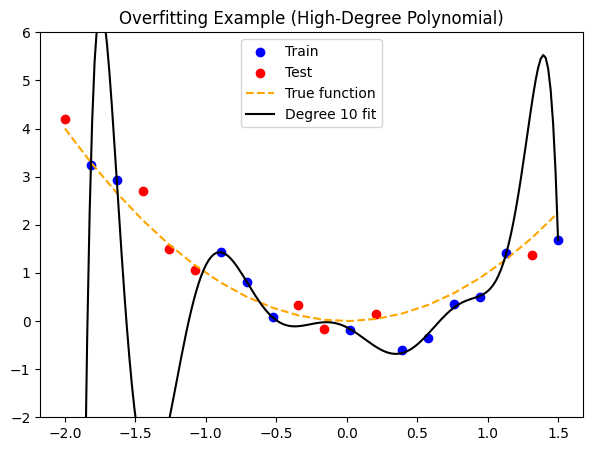

In [267]:
plt.figure(figsize=(7, 5))
plt.scatter(X_train, y_train, color="blue", label="Train")
plt.scatter(X_test, y_test, color="red", label="Test")
plt.plot(x, y_true, color="orange", linestyle="--", label="True function")
plt.plot(x_plot, y_plot, color="black", label=f"Degree {degree} fit")
plt.title("Overfitting Example (High-Degree Polynomial)")
plt.ylim(-2, 6)
plt.legend()
plt.show()

Here we see that although the model fits the training points almost perfectly, it deviates strongly from the true underlying function.
This means it does not generalize well.

Gradient Descent MSE vs. Iteration also reflects this behavior:

In [ ]:
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Convert to tensors
X_train_t = torch.tensor(X_train_poly, dtype=torch.float32)
y_train_t = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)

X_test_t = torch.tensor(X_test_poly, dtype=torch.float32)
y_test_t = torch.tensor(y_test, dtype=torch.float32).view(-1, 1)

model = nn.Linear(X_train_poly.shape[1], 1, bias=True)
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.00002)

num_iters = 3000

train_losses = []
test_losses = []

for i in range(num_iters):
    model.train()
    y_pred = model(X_train_t)
    train_loss = criterion(y_pred, y_train_t)

    optimizer.zero_grad()
    train_loss.backward()
    optimizer.step()

    train_losses.append(train_loss.item())

    model.eval()
    with torch.no_grad():
        y_pred_test = model(X_test_t)
        test_loss = criterion(y_pred_test, y_test_t).item()
        test_losses.append(test_loss)

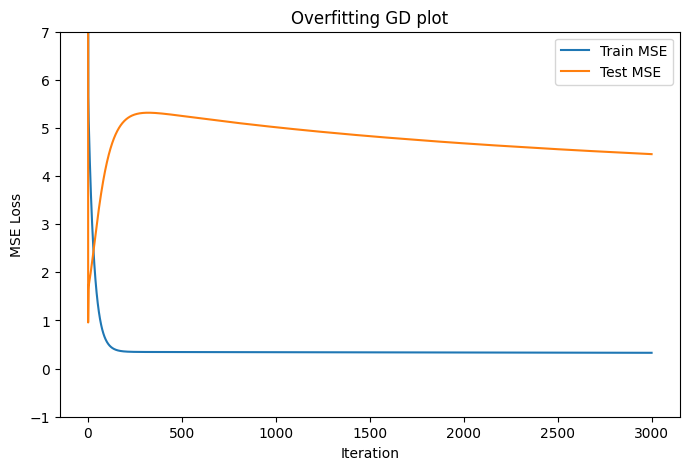

In [343]:
plt.figure(figsize=(8,5))
plt.plot(train_losses, label="Train MSE")
plt.plot(test_losses, label="Test MSE")
plt.xlabel("Iteration")
plt.ylabel("MSE Loss")
plt.ylim(-1, 7)
plt.title("Overfitting GD plot")
plt.legend()
plt.show()

The train loss goes toward zero, showing the model is memorizing the training data.

Meanwhile, the test loss stays high, which is a clear sign of overfitting.

---

### Good fit

Finally, let’s visualize a model that fits the data just right.

A good model balances both:

- low enough bias to capture the true pattern

- low enough variance to generalize well to new data

In [11]:
degree = 2
poly = PolynomialFeatures(degree)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

model = LinearRegression()
model.fit(X_train_poly, y_train)

# Predictions
y_pred_train = model.predict(X_train_poly)
y_pred_test = model.predict(X_test_poly)
x_plot = np.linspace(-2, 1.5, 200).reshape(-1, 1)
y_plot = model.predict(poly.transform(x_plot))

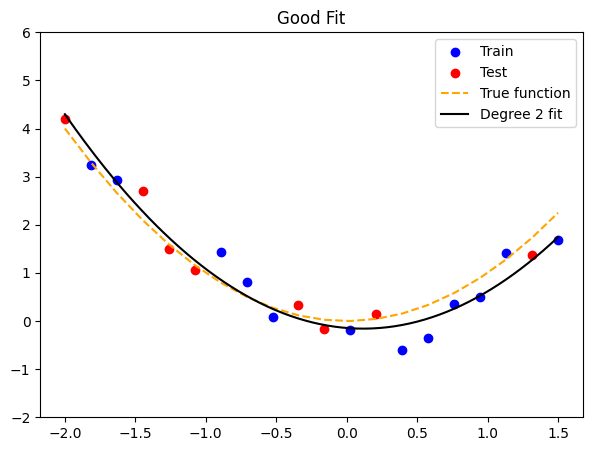

In [346]:
plt.figure(figsize=(7, 5))
plt.scatter(X_train, y_train, color="blue", label="Train")
plt.scatter(X_test, y_test, color="red", label="Test")
plt.plot(x, y_true, color="orange", linestyle="--", label="True function")
plt.plot(x_plot, y_plot, color="black", label=f"Degree {degree} fit")
plt.title("Good Fit")
plt.ylim(-2, 6)
plt.legend()
plt.show()

In [353]:
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Convert to tensors
X_train_t = torch.tensor(X_train_poly, dtype=torch.float32)
y_train_t = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)

X_test_t = torch.tensor(X_test_poly, dtype=torch.float32)
y_test_t = torch.tensor(y_test, dtype=torch.float32).view(-1, 1)

model = nn.Linear(X_train_poly.shape[1], 1, bias=True)
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.0005)   # small LR for stability

num_iters = 3000

train_losses = []
test_losses = []

for i in range(num_iters):
    model.train()
    y_pred = model(X_train_t)
    train_loss = criterion(y_pred, y_train_t)

    optimizer.zero_grad()
    train_loss.backward()
    optimizer.step()

    train_losses.append(train_loss.item())

    model.eval()
    with torch.no_grad():
        y_pred_test = model(X_test_t)
        test_loss = criterion(y_pred_test, y_test_t).item()
        test_losses.append(test_loss)

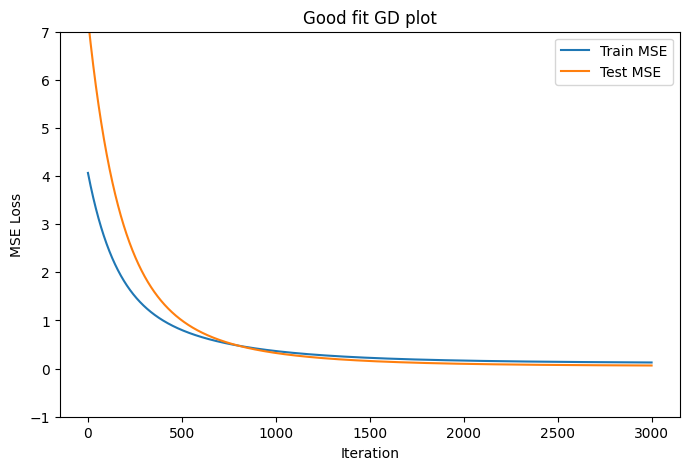

In [355]:
plt.figure(figsize=(8,5))
plt.plot(train_losses, label="Train MSE")
plt.plot(test_losses, label="Test MSE")
plt.xlabel("Iteration")
plt.ylabel("MSE Loss")
plt.ylim(-1, 7)
plt.title("Good fit GD plot")
plt.legend()
plt.show()

Here the overall error is low, and the train and test losses are close to each other.
This indicates good generalization and shows that the model has the right amount of complexity for the data.

---


### Conclusions

- Underfitting occurs when the model is too simple.
It cannot capture the true pattern in the data, resulting in high train and test loss.
Increasing model complexity usually helps.

- Overfitting occurs when the model is too complex.
It fits the noise in the training data, leading to very low train loss but high test loss.
Regularization or reducing model complexity helps.

- A good fit is achieved when the model captures the underlying pattern without memorizing noise.
This is visible when both train and test losses are low and close to each other.

Overall, the goal is to find a model that is complex enough to explain the data but simple enough to generalize well.